## Task 1 - Iris Flowers Classification ML Project

***Dataset Link :*** http://archive.ics.uci.edu/ml/datasets/Iris

#### Import Libraries

In [1]:
# Import All the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

#### Load the data

In [2]:
# Load the data

columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species'] 

data = pd.read_csv('iris.data', names = columns)

In [3]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Sepal length,Sepal width,Petal length,Petal width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# summary of iris dataset

data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Exploratory Data Analysis

In [8]:
# checking missing value

data.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64

In [9]:
# count the Species values

data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
size = data.value_counts()

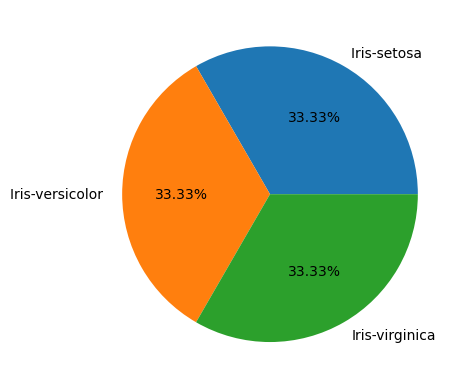

In [11]:
# pie chart for Species

fig = plt.figure()
size = data['Species'].value_counts()
label = ['Iris-setosa ', 'Iris-versicolor ', 'Iris-virginica']
plt.pie(size, labels = label, autopct = '%1.2f%%')
plt.show()

In [12]:
data.columns

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object')

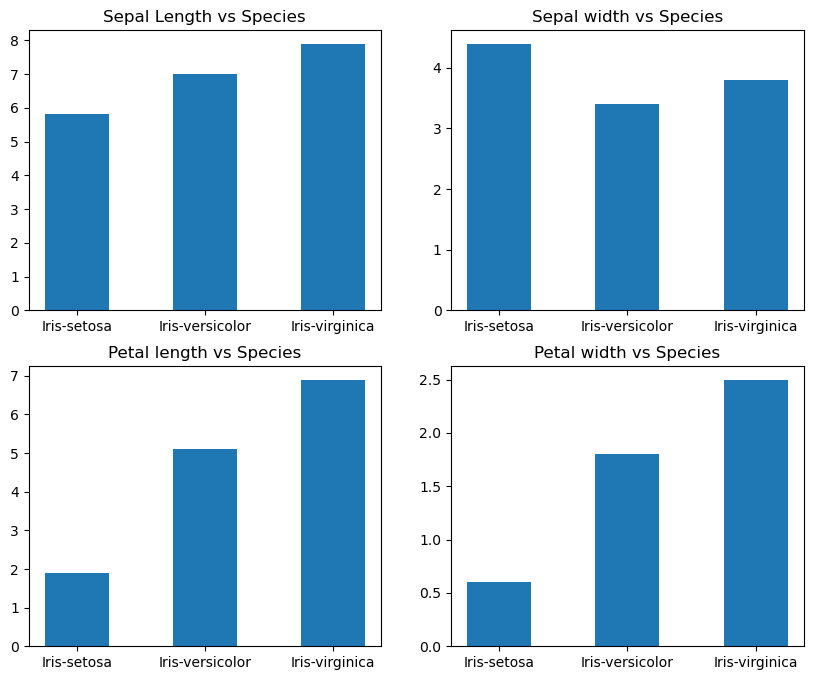

In [13]:
# barchart

plt.subplots(2, 2, figsize = (10, 8))

plt.subplot(221)
plt.bar(data['Species'], data['Sepal length'], width = 0.5) 
plt.title("Sepal Length vs Species")

plt.subplot(222)
plt.bar(data['Species'], data['Sepal width'], width = 0.5) 
plt.title("Sepal width vs Species")

plt.subplot(223)
plt.bar(data['Species'], data['Petal length'], width = 0.5) 
plt.title("Petal length vs Species")

plt.subplot(224)
plt.bar(data['Species'], data['Petal width'], width = 0.5) 
plt.title("Petal width vs Species")

plt.show()

array([[<Axes: title={'center': 'Sepal length'}>,
        <Axes: title={'center': 'Sepal width'}>],
       [<Axes: title={'center': 'Petal length'}>,
        <Axes: title={'center': 'Petal width'}>]], dtype=object)

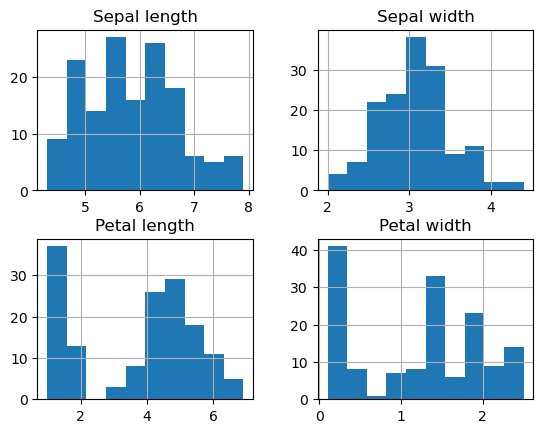

In [14]:
# histplt

data.hist()

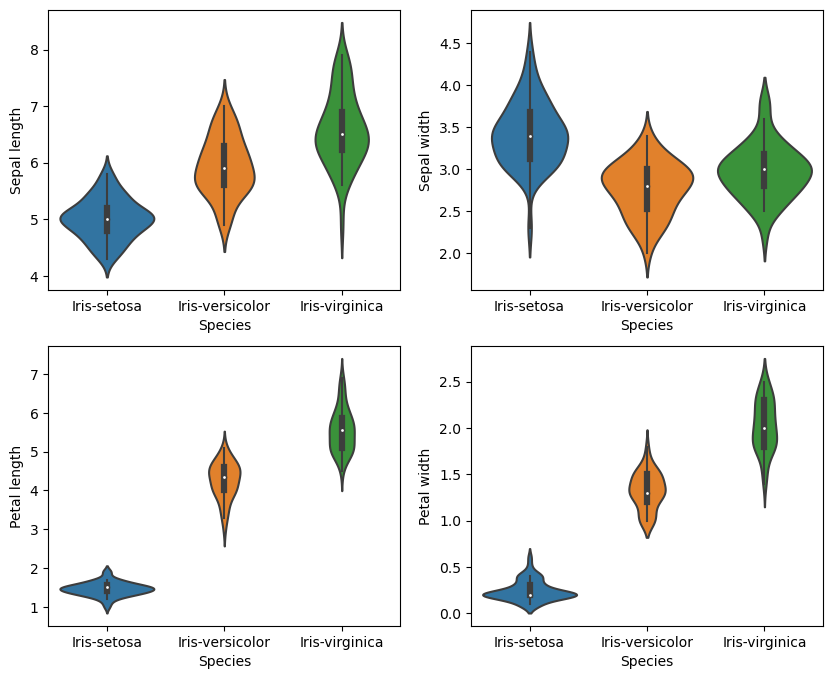

In [15]:
# violinplot

plt.subplots(2, 2, figsize = (10, 8))

plt.subplot(221)
sns.violinplot(x = 'Species', y = 'Sepal length', data = data)

plt.subplot(222)
sns.violinplot(x = 'Species', y = 'Sepal width', data = data)

plt.subplot(223)
sns.violinplot(x = 'Species', y = 'Petal length', data = data)

plt.subplot(224)
sns.violinplot(x = 'Species', y = 'Petal width', data = data)

plt.show()

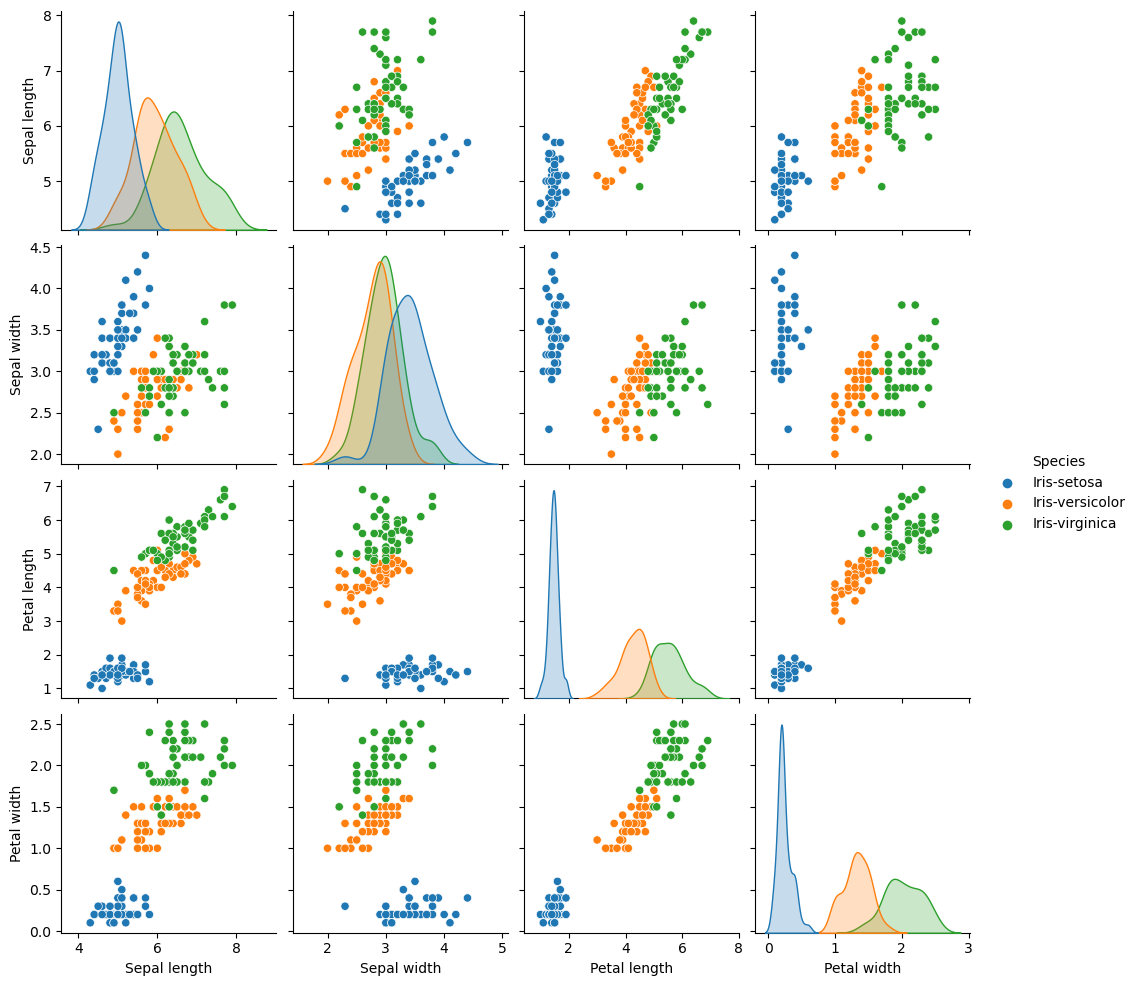

In [16]:
# pairplot

sns.pairplot(data, hue = 'Species');

<Axes: >

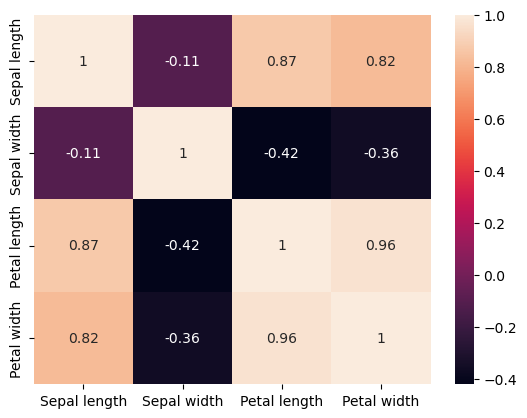

In [17]:
# heatmap

sns.heatmap(data.corr(), annot = True)

#### Splitting the data

In [18]:
x = data.drop(columns = "Species")
y = data["Species"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

#### Building Model using Logistic Regression

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [22]:
logistic_train_predict = logistic_model.predict(x_train)
logistic_test_predict = logistic_model.predict(x_test)

In [23]:
print('\n Logistic Regression Training Accuracy Score : ', metrics.accuracy_score(logistic_train_predict, y_train))
print('\n Logistic Regression Testing Accuracy Score : ', metrics.accuracy_score(logistic_test_predict, y_test))
print('\n\n Logistic Regression Confusion Matrix : \n', confusion_matrix(logistic_test_predict, y_test))
print('\n\n Logistic Regression Classification Report : \n', classification_report(logistic_test_predict, y_test))


 Logistic Regression Training Accuracy Score :  0.9833333333333333

 Logistic Regression Testing Accuracy Score :  0.9666666666666667


 Logistic Regression Confusion Matrix : 
 [[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]


 Logistic Regression Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



#### Building Model using knn - K-nearest neighbor

In [24]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
knn_train_predict = knn_model.predict(x_train)
knn_test_predict = knn_model.predict(x_test)

In [26]:
print('\n K-Nearest Neighbor Training Accuracy Score : ', metrics.accuracy_score(knn_train_predict, y_train))
print('\n K-Nearest Neighbor Testing Accuracy Score : ', metrics.accuracy_score(knn_test_predict, y_test))
print('\n\n K-Nearest Neighbor Confusion Matrix : \n', confusion_matrix(knn_test_predict, y_test))
print('\n\n K-Nearest Neighbor Classification Report : \n', classification_report(knn_test_predict, y_test))


 K-Nearest Neighbor Training Accuracy Score :  0.9583333333333334

 K-Nearest Neighbor Testing Accuracy Score :  1.0


 K-Nearest Neighbor Confusion Matrix : 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


 K-Nearest Neighbor Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Building Model using SVC - Support Vector Classifier

In [27]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [28]:
svc_train_predict = svc_model.predict(x_train)
svc_test_predict = svc_model.predict(x_test)

In [29]:
print('\n Support Vector Classifier Training Accuracy Score : ', metrics.accuracy_score(svc_train_predict, y_train))
print('\n Support Vector Classifier Testing Accuracy Score : ', metrics.accuracy_score(svc_test_predict, y_test))
print('\n\n Support Vector Classifier Confusion Matrix : \n', confusion_matrix(svc_test_predict, y_test))
print('\n\n Support Vector Classifier Classification Report : \n', classification_report(svc_test_predict, y_test))


 Support Vector Classifier Training Accuracy Score :  0.975

 Support Vector Classifier Testing Accuracy Score :  0.9666666666666667


 Support Vector Classifier Confusion Matrix : 
 [[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]


 Support Vector Classifier Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



#### Building Model using Decision Tree Classifier

In [30]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
decision_tree_train_predict = decision_tree_model.predict(x_train)
decision_tree_test_predict = decision_tree_model.predict(x_test)

In [32]:
print('\n Decion Tree Classifier Training Accuracy Score : ', metrics.accuracy_score(decision_tree_train_predict, y_train))
print('\n Decion Tree Classifier Testing Accuracy Score : ', metrics.accuracy_score(decision_tree_test_predict, y_test))
print('\n\n Decion Tree Classifier Confusion Matrix : \n', confusion_matrix(decision_tree_test_predict, y_test))
print('\n\n Decion Tree Classifier Classification Report : \n', classification_report(decision_tree_test_predict, y_test))


 Decion Tree Classifier Training Accuracy Score :  1.0

 Decion Tree Classifier Testing Accuracy Score :  0.9666666666666667


 Decion Tree Classifier Confusion Matrix : 
 [[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]


 Decion Tree Classifier Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



***Observation :***

- Logistic Regression Testing Accuracy Score :  0.9666666666666667

- K-Nearest Neighbor Testing Accuracy Score :  1.0

- Support Vector Classifier Testing Accuracy Score :  0.9666666666666667

- Decion Tree Classifier Testing Accuracy Score :  0.9666666666666667